In [1]:
from get_sentiment import *
plt.style.use('ggplot')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dizquierdo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
with open('data/tweets.json', 'r') as f:
    data = json.load(f)

In [3]:
clean_tweets, tag_set = cluster_flocks(data)

In [4]:
clean_tweets[:5]

[['', []],
 ['At school we’ve been talking about endangered/extinct animals, so my classroom adopted a kangaroo. Can’t wait to show them this tomorrow 🦘 😊   ',
  ['#silverroom', '#australia']],
 ['Sydney-local made tee with 100% profits to  and Carbon Neutral Charity Fund.\n\nPre-order before Monday 3rd 8am. at \n\n         ',
  ['#coffee',
   '#australia',
   '#art',
   '#illustration',
   '#sydney',
   '#innerwest',
   '#planetearth',
   '#bushfireemergency',
   '#community']],
 [' Hair band, Can, Trolley ', ['#Australia']],
 ['Standing on the shore.\n.\n.\n.\n                    … ',
  ['#photography',
   '#photographer',
   '#life',
   '#art',
   '#documentary',
   '#portrait',
   '#analog',
   '#digital',
   '#instagood',
   '#instagram',
   '#instadaily',
   '#documentaryphotography',
   '#artphotography',
   '#portraitphotography',
   '#antipodean',
   '#australia',
   '#newzealand',
   '#nikon',
   '#nikonaustralia',
   '#d850',
   '#nikond85']]]

In [5]:
tag_set.most_common(5)

[('#auspol', 359),
 ('#Australia', 350),
 ('#ClimateCrisis', 290),
 ('#ClimateActionNow', 271),
 ('#straya', 257)]

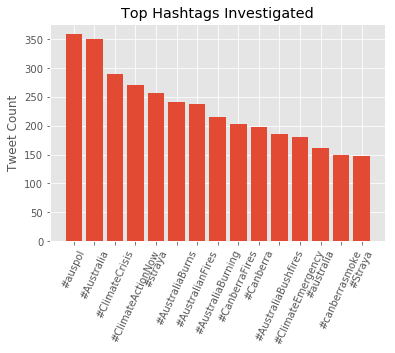

In [6]:
plt.bar([tag[0] for tag in tag_set.most_common(15)], [tag[1] for tag in tag_set.most_common(15)])
plt.xticks(rotation=65)
plt.ylabel('Tweet Count')
plt.title('Top Hashtags Investigated')
plt.show;

In [7]:
word_count = Counter(" ".join([re.sub(r'\s',' ',tweet[0]).strip() for tweet in clean_tweets]).split())

In [8]:
word_count.most_common(10)

[('the', 2174),
 ('to', 1612),
 ('of', 1041),
 ('a', 985),
 ('in', 966),
 ('and', 962),
 ('is', 721),
 ('for', 681),
 ('on', 452),
 ('this', 380)]

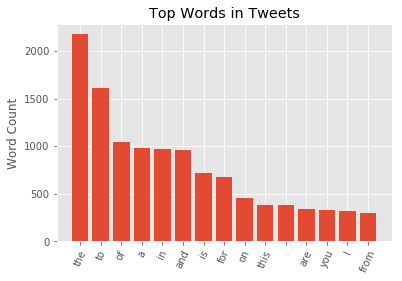

In [9]:
plt.bar([word[0] for word in word_count.most_common(15)], [word[1] for word in word_count.most_common(15)])
plt.xticks(rotation=65)
plt.ylabel('Word Count')
plt.title('Top Words in Tweets')
plt.show();

In [10]:
stopwords_list=stopwords.words('english') +list(string.punctuation)
stopwords_list += ["&amp;","'",'"','...','``','…','’','‘','“',"''",'""','”','”','co',"'s'",'\'s','n\'t','\'m','\'re','amp','https']
    

In [14]:
tweets = [tweet[0] for tweet in clean_tweets]

In [15]:
wordfrequency(tweets, 20)

[('fire', 303),
 ('australia', 266),
 ('day', 224),
 ('climate', 150),
 ('australian', 146),
 ('de', 134),
 ('like', 133),
 ('people', 129),
 ('time', 128),
 ('u', 123),
 ('need', 117),
 ('one', 113),
 ('get', 108),
 ('help', 107),
 ('change', 106),
 ('canberra', 96),
 ('see', 94),
 ('go', 93),
 ('new', 90),
 ('still', 90)]

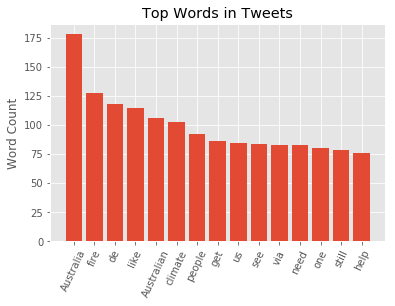

In [11]:
plt.bar([word[0] for word in word_count.most_common(100) if word[0].lower() not in stopwords_list][:15], [word[1] for word in word_count.most_common(100) if word[0].lower() not in stopwords_list][:15])
plt.xticks(rotation=65)
plt.ylabel('Word Count')
plt.title('Top Words in Tweets')
plt.show;

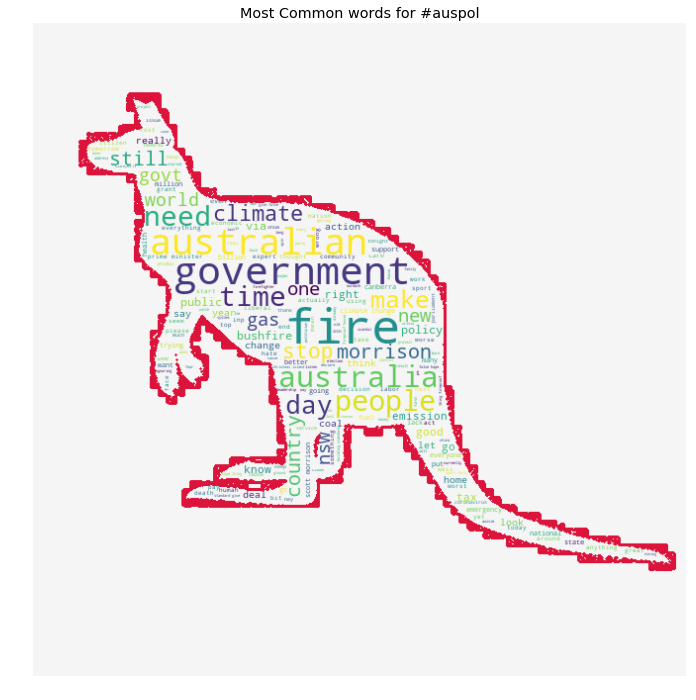

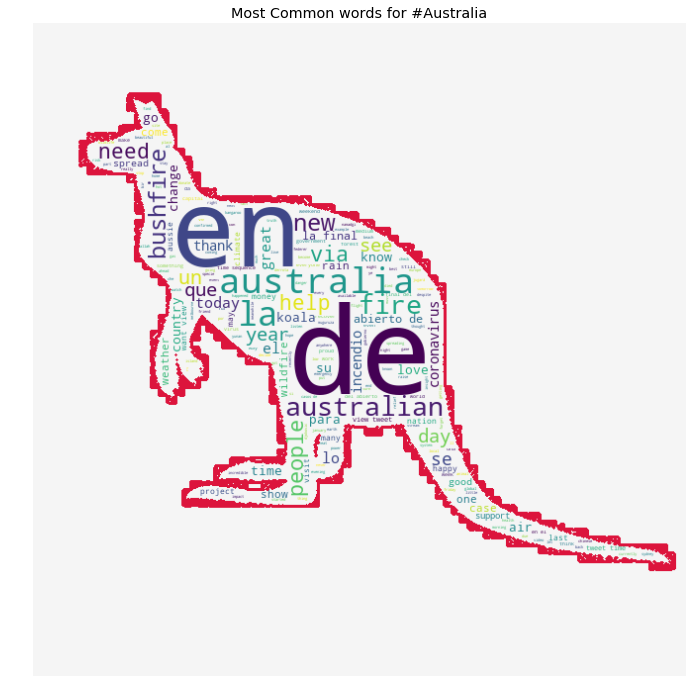

TypeError: sequence item 3550: expected str instance, tuple found

In [12]:
for tag in tag_set.most_common(5):
    subset = list(filter(lambda x: tag[0] in x[1], clean_tweets))
    create_wordcloud([tweet[0] for tweet in subset] , tag[0], 200)

In [5]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [15]:
from nltk.collocations import BigramCollocationFinder as big_find

In [36]:
tweets = [tweet[0] for tweet in clean_tweets]
vocab = tokenized(tweets)
big = big_find.from_words(vocab)
# b.apply_freq_filter(1)
big_measures = nltk.collocations.BigramAssocMeasures()
bestBigrams = big.above_score(score_fn=big_measures.raw_freq, min_score=1.0/len(tuple(nltk.bigrams(tweets))))
vocab += bestBigrams